In [151]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score


In [152]:

#Binary Classification
df=pd.read_csv("OrthopedicPatients2Class.csv")
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [16]:
# Before Applying KNN, we need to first drop any feature that has negative values

df.drop("degree_spondylolisthesis",axis=1,inplace=True)

In [17]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,Abnormal


In [98]:
X=df.loc[:,df.columns !="class"].values


Y=df[["class"]].values

# Normalization of features to make sure each feature is contributing equally
X_data=(X-np.min(X))/(np.max(X)-np.min(X))

Y=Y.reshape((310,))







In [144]:
# train test split

X_train,X_test,Y_train,Y_test=train_test_split(X_data,Y,test_size=0.2,random_state=1)

#lets start with 3 neighbors intitially 
knn_clf=KNeighborsClassifier(n_neighbors=3)








In [145]:
knn_clf.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [146]:
y_pred=knn_clf.predict(X_test)

In [129]:
y_pred

array(['Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Abnormal', 'Normal', 'Abnormal', 'Normal', 'Normal', 'Abnormal',
       'Normal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Normal', 'Abnormal', 'Normal', 'Abnormal',
       'Normal', 'Normal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal',
       'Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal',
       'Abnormal'], dtype=object)

In [147]:
knn_clf.score(X_test,Y_test)

0.6774193548387096

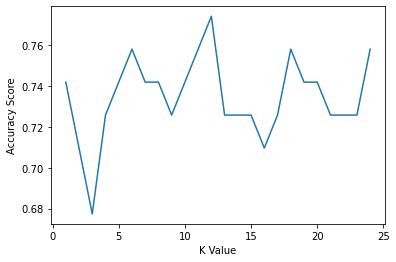

In [108]:
# now this was the accuracy score for when k=3, lets see the accuracy when k is higher


accuracy_scores=[]

for i in range(1,25):
  knn_clf_new=KNeighborsClassifier(n_neighbors=i) 
  knn_clf_new.fit(X_train,Y_train)
  accuracy_scores.append(knn_clf_new.score(X_test,Y_test))
plt.plot(range(1,25),accuracy_scores)
plt.xlabel("K Value")
plt.ylabel("Accuracy Score")
plt.show()
 


In [148]:
# We can see from the above plot that the optimum k value is 12


# Now lets perform cross validation to improve our accuracy

cross_val_score(knn_clf,X_train,Y_train,cv=3,scoring="accuracy")




array([0.79518072, 0.77108434, 0.74390244])

In [150]:
# we can immdediatly see that performing cross validation increases the accuracy score

#now lets check the confusion matrix 

confusion_matrix(Y_test,y_pred)



array([[30, 12],
       [ 8, 12]], dtype=int64)